In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [267]:
match=pd.read_csv('matches.csv')

In [268]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,era,date_clean
0,335982.0,0.0,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,Modern IPL (2018–Present),NaN
1,335983.0,0.0,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,Modern IPL (2018–Present),NaN
2,335984.0,0.0,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,Modern IPL (2018–Present),NaN
3,335985.0,0.0,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,Modern IPL (2018–Present),NaN
4,335986.0,0.0,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,Modern IPL (2018–Present),NaN


In [269]:
match.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'era', 'date_clean'],
      dtype='object')

In [270]:
delivery=pd.read_csv('deliveries.csv')

/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/172564990.py:1: DtypeWarning: Columns (6,8,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  delivery=pd.read_csv('deliveries.csv')


In [271]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [272]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [273]:
delivery['total_runs'] = pd.to_numeric(delivery['total_runs'], errors='coerce')

In [274]:
# 1. Remove duplicate rows
delivery = delivery.drop_duplicates()

# 2. Ensure total_runs is numeric
delivery['total_runs'] = pd.to_numeric(delivery['total_runs'], errors='coerce')

# 3. Group and sum ONLY the numeric columns (This avoids the TypeError)
total_score_df = delivery.groupby(['match_id', 'inning']).sum(numeric_only=True)['total_runs'].reset_index()

# 4. Filter for 1st innings only
total_score_df = total_score_df[total_score_df['inning'] == 1]

# View the clean result
total_score_df.head()

,match_id,inning,total_runs
1,335982.0,1,222
3,335983.0,1,240
5,335984.0,1,129
7,335985.0,1,165
9,335986.0,1,110


In [275]:
total_score_df[total_score_df['inning']==1]

,match_id,inning,total_runs
1,335982.0,1,222
3,335983.0,1,240
5,335984.0,1,129
7,335985.0,1,165
9,335986.0,1,110
...,...,...,...
2355,1426382.0,1,227
2357,1426383.0,1,101
2359,1426384.0,1,227
2361,1426385.0,1,203


In [276]:
match_df=match.merge(total_score_df[['match_id','total_runs']], left_on='id', right_on='match_id')

In [277]:
match_df['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Lucknow Super Giants',
       'Gujarat Titans'], dtype=object)

In [278]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Royal Challengers Bengaluru',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans',
    'Lucknow Super Giants'
]

In [279]:
# 3. Replace old names with Title Case names
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Punjab Kings','Kings XI Punjab')
match_df['team2'] = match_df['team2'].str.replace('Punjab Kings','Kings XI Punjab')

# 4. Filter again (This time it will find matches)
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [280]:
match_df.shape

(980, 24)

In [281]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_runs,target_overs,super_over,method,umpire1,umpire2,era,date_clean,match_id,total_runs
0,335982.0,0.0,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,Modern IPL (2018–Present),NaN,335982.0,222
1,335983.0,0.0,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,241.0,20.0,N,NaN,MR Benson,SL Shastri,Modern IPL (2018–Present),NaN,335983.0,240
2,335984.0,0.0,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,Modern IPL (2018–Present),NaN,335984.0,129
3,335985.0,0.0,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,166.0,20.0,N,NaN,SJ Davis,DJ Harper,Modern IPL (2018–Present),NaN,335985.0,165
4,335986.0,0.0,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,111.0,20.0,N,NaN,BF Bowden,K Hariharan,Modern IPL (2018–Present),NaN,335986.0,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307.0,2024.0,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Kings XI Punjab,Sunrisers Hyderabad,Punjab Kings,...,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,Modern IPL (2018–Present),NaN,1426307.0,214
1091,1426309.0,2024.0,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,Modern IPL (2018–Present),NaN,1426309.0,159
1092,1426310.0,2024.0,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,Modern IPL (2018–Present),NaN,1426310.0,172
1093,1426311.0,2024.0,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,Modern IPL (2018–Present),NaN,1426311.0,175


In [282]:
match_df=match_df[['match_id','city','winner','total_runs' ]]

In [283]:
match_df

,match_id,city,winner,total_runs
0,335982.0,Bangalore,Kolkata Knight Riders,222
1,335983.0,Chandigarh,Chennai Super Kings,240
2,335984.0,Delhi,Delhi Capitals,129
3,335985.0,Mumbai,Royal Challengers Bengaluru,165
4,335986.0,Kolkata,Kolkata Knight Riders,110
...,...,...,...,...
1090,1426307.0,Hyderabad,Sunrisers Hyderabad,214
1091,1426309.0,Ahmedabad,Kolkata Knight Riders,159
1092,1426310.0,Ahmedabad,Rajasthan Royals,172
1093,1426311.0,Chennai,Sunrisers Hyderabad,175


In [284]:
delivery_df=match_df.merge(delivery,on='match_id')

In [285]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982.0,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982.0,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982.0,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982.0,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982.0,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233896,1426312.0,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9.0,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
233897,1426312.0,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9.0,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
233898,1426312.0,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10.0,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
233899,1426312.0,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10.0,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [286]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [287]:
delivery_df.shape

(112805, 20)

In [288]:
#calculate current score
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/689841282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [289]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4


In [290]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/1162889266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


In [291]:
delivery_df.head(1000)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,335990.0,Hyderabad,Rajasthan Royals,214,2,Rajasthan Royals,Deccan Chargers,16.0,2,GC Smith,...,1,0,1,NaN,0,NaN,NaN,NaN,181,33
2104,335990.0,Hyderabad,Rajasthan Royals,214,2,Rajasthan Royals,Deccan Chargers,16.0,3,M Kaif,...,1,0,1,NaN,0,NaN,NaN,NaN,182,32
2105,335990.0,Hyderabad,Rajasthan Royals,214,2,Rajasthan Royals,Deccan Chargers,16.0,4,GC Smith,...,1,0,1,NaN,0,NaN,NaN,NaN,183,31
2106,335990.0,Hyderabad,Rajasthan Royals,214,2,Rajasthan Royals,Deccan Chargers,16.0,5,M Kaif,...,1,0,1,NaN,0,NaN,NaN,NaN,184,30


In [292]:
delivery_df['balls_bowled'] = (delivery_df['over'] * 6) + delivery_df['ball']
delivery_df['balls_left'] = 120 - delivery_df['balls_bowled']
delivery_df['balls_left'] = delivery_df['balls_left'].apply(lambda x: 0 if x < 0 else x)

/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/2673181364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_bowled'] = (delivery_df['over'] * 6) + delivery_df['ball']
/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/2673181364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 120 - delivery_df['balls_bowled']
/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/2673181364.py:3: SettingWithCopyWarning: 
A value is t

In [293]:
delivery_df.head(1000)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_bowled,balls_left
124,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1,R Dravid,...,1,NaN,0,NaN,NaN,NaN,1,221,1.0,119.0
125,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2,W Jaffer,...,1,wides,0,NaN,NaN,NaN,2,220,2.0,118.0
126,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3,W Jaffer,...,0,NaN,0,NaN,NaN,NaN,2,220,3.0,117.0
127,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4,W Jaffer,...,1,NaN,0,NaN,NaN,NaN,3,219,4.0,116.0
128,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5,R Dravid,...,1,NaN,0,NaN,NaN,NaN,4,218,5.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,335990.0,Hyderabad,Rajasthan Royals,214,2,Rajasthan Royals,Deccan Chargers,16.0,2,GC Smith,...,1,NaN,0,NaN,NaN,NaN,181,33,98.0,22.0
2104,335990.0,Hyderabad,Rajasthan Royals,214,2,Rajasthan Royals,Deccan Chargers,16.0,3,M Kaif,...,1,NaN,0,NaN,NaN,NaN,182,32,99.0,21.0
2105,335990.0,Hyderabad,Rajasthan Royals,214,2,Rajasthan Royals,Deccan Chargers,16.0,4,GC Smith,...,1,NaN,0,NaN,NaN,NaN,183,31,100.0,20.0
2106,335990.0,Hyderabad,Rajasthan Royals,214,2,Rajasthan Royals,Deccan Chargers,16.0,5,M Kaif,...,1,NaN,0,NaN,NaN,NaN,184,30,101.0,19.0


In [294]:
# 1. IMPORTANT: Re-fetch the original column to clear the previous errors
delivery_df['player_dismissed'] = delivery.loc[delivery_df.index, 'player_dismissed']

# 2. Fill NaN with "0"
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# 3. Correct Lambda: No quotes around the 0 or 1 (Numeric logic)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == "0" else 1)

# 4. Convert to integer
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)

# 5. Group and calculate wickets correctly
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets

# 6. Verify: player_dismissed should be 0 for most rows now
delivery_df[['match_id', 'player_dismissed', 'wickets']].head(20)

/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/716896160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery.loc[delivery_df.index, 'player_dismissed']
/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/716896160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/716896160.py:8: SettingWithCopyW

,match_id,player_dismissed,wickets
124,335982.0,0,10
125,335982.0,0,10
126,335982.0,0,10
127,335982.0,0,10
128,335982.0,0,10
129,335982.0,0,10
130,335982.0,0,10
131,335982.0,1,9
132,335982.0,0,9
133,335982.0,0,9


In [295]:
delivery_df.head(100)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_bowled,balls_left,wickets
124,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1,R Dravid,...,NaN,0,0,NaN,NaN,1,221,1.0,119.0,10
125,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2,W Jaffer,...,wides,0,0,NaN,NaN,2,220,2.0,118.0,10
126,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3,W Jaffer,...,NaN,0,0,NaN,NaN,2,220,3.0,117.0,10
127,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4,W Jaffer,...,NaN,0,0,NaN,NaN,3,219,4.0,116.0,10
128,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5,R Dravid,...,NaN,0,0,NaN,NaN,4,218,5.0,115.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14.0,4,SB Joshi,...,NaN,0,0,NaN,NaN,79,143,88.0,32.0,1
220,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14.0,5,P Kumar,...,legbyes,0,0,NaN,NaN,80,142,89.0,31.0,1
221,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14.0,6,SB Joshi,...,NaN,0,0,NaN,NaN,81,141,90.0,30.0,1
222,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14.0,7,P Kumar,...,NaN,0,0,NaN,NaN,81,141,91.0,29.0,1


In [296]:
delivery_df['crr'] = (delivery_df['current_score'] * 6) / (120 - delivery_df['balls_left'])

/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/1473975216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score'] * 6) / (120 - delivery_df['balls_left'])


In [297]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_bowled,balls_left,wickets,crr
124,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1,R Dravid,...,0,0,NaN,NaN,1,221,1.0,119.0,10,6.0
125,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2,W Jaffer,...,0,0,NaN,NaN,2,220,2.0,118.0,10,6.0
126,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3,W Jaffer,...,0,0,NaN,NaN,2,220,3.0,117.0,10,4.0
127,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4,W Jaffer,...,0,0,NaN,NaN,3,219,4.0,116.0,10,4.5
128,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5,R Dravid,...,0,0,NaN,NaN,4,218,5.0,115.0,10,4.8


In [298]:
delivery_df['rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']

/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/2316392633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']


In [299]:
delivery_df['rrr']

124       11.142857
125       11.186441
126       11.282051
127       11.327586
128       11.373913
            ...    
233896     0.295082
233897     0.200000
233898     0.101695
233899     0.000000
233900    -0.105263
Name: rrr, Length: 112805, dtype: float64

In [300]:
def result(row):
    return 1 if row['winner'] == row['batting_team'] else 0


In [301]:
delivery_df['result'] = delivery_df.apply(result, axis=1)

/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/343102418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result, axis=1)


In [302]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_bowled,balls_left,wickets,crr,rrr,result
124,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1,R Dravid,...,NaN,NaN,1,221,1.0,119.0,10,6.0,11.142857,0
125,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2,W Jaffer,...,NaN,NaN,2,220,2.0,118.0,10,6.0,11.186441,0
126,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3,W Jaffer,...,NaN,NaN,2,220,3.0,117.0,10,4.0,11.282051,0
127,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4,W Jaffer,...,NaN,NaN,3,219,4.0,116.0,10,4.5,11.327586,0
128,335982.0,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5,R Dravid,...,NaN,NaN,4,218,5.0,115.0,10,4.8,11.373913,0


In [303]:


# 1. Manually define the list of columns to ensure no hidden characters
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr', 'result']]

final_df=final_df.sample(final_df.shape[0])

final_df.sample(
)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
37756,Kings XI Punjab,Delhi Daredevils,Delhi,36,40.0,8,111,5.625,5.4,0


In [304]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
runs_left        0
balls_left       0
wickets          0
total_runs_x     0
crr              0
rrr             17
result           0
dtype: int64

In [305]:
final_df.dropna(inplace=True)

#model building 

In [306]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [307]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
5194,Deccan Chargers,Royal Challengers Bangalore,Bangalore,71,50.0,5,156,7.285714,8.520000
144690,Chennai Super Kings,Kolkata Knight Riders,Kolkata,112,76.0,2,161,6.681818,8.842105
34530,Royal Challengers Bangalore,Kings XI Punjab,Chandigarh,171,107.0,10,181,4.615385,9.588785
81110,Royal Challengers Bangalore,Delhi Daredevils,Unknown,93,81.0,7,145,8.000000,6.888889
159086,Sunrisers Hyderabad,Chennai Super Kings,Unknown,147,102.0,9,167,6.666667,8.647059
...,...,...,...,...,...,...,...,...,...
120216,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,132,63.0,7,207,7.894737,12.571429
14434,Royal Challengers Bangalore,Chennai Super Kings,Port Elizabeth,129,73.0,5,179,6.382979,10.602740
155892,Kolkata Knight Riders,Delhi Capitals,Unknown,197,101.0,8,228,9.789474,11.702970
130462,Delhi Daredevils,Chennai Super Kings,Pune,210,114.0,10,211,1.000000,11.052632


In [308]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [310]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [312]:
pipe.fit(X_train,y_train)

/Users/rushikeshmarotraojoshi/Desktop/ipl/ipl_env/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [313]:
import numpy as np

# 1. Replace any infinity values (resulting from division by zero) with 0
final_df.replace([np.inf, -np.inf], 0, inplace=True)

# 2. Drop any remaining NaNs just to be 100% safe
final_df.dropna(inplace=True)

# 3. Re-split the data now that it's clean
X = final_df.drop('result', axis=1)
y = final_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4. Train the pipeline
pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('step1', ...), ('step2', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('trf', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse 

In [314]:
y_pred = pipe.predict(X_test)

In [315]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8578331412359251

In [317]:
pipe.predict_proba(X_test)[0]

array([0.06206604, 0.93793396])

lets try on diff matches

In [321]:
def match_progression(x_df, match_id, pipe):
    # Filter for a specific match
    match = x_df[x_df['match_id'] == match_id]
    
    # Keep only the columns the model expects
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']]
    
    # Get probabilities for every ball
    result = pipe.predict_proba(temp_df)
    
    # Add probabilities to the match dataframe
    match['lose'] = np.round(result.T[0] * 100, 1)
    match['win'] = np.round(result.T[1] * 100, 1)
    
    # Only show the state at the end of each over for clarity
    match = match[match['ball'] == 6]
    
    return match[['over', 'runs_left', 'balls_left', 'wickets', 'win', 'lose']]

# Try it with a Match ID (e.g., 335982.0)
match_id = 335982.0
match_progression(delivery_df, match_id, pipe)

/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/2031657952.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['lose'] = np.round(result.T[0] * 100, 1)
/var/folders/sq/59dhcgr90mj26f1kyvqyrsfc0000gn/T/ipykernel_9104/2031657952.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['win'] = np.round(result.T[1] * 100, 1)


,over,runs_left,balls_left,wickets,win,lose
129,0.0,218,114.0,10,0.0,100.0
136,1.0,213,108.0,9,0.0,100.0
142,2.0,211,102.0,8,0.0,100.0
149,3.0,206,96.0,8,0.0,100.0
155,4.0,198,90.0,7,0.0,100.0
161,5.0,196,84.0,6,0.0,100.0
167,6.0,193,78.0,6,0.0,100.0
175,7.0,184,72.0,5,0.0,100.0
181,8.0,181,66.0,4,0.0,100.0
189,9.0,172,60.0,3,0.0,100.0


In [322]:
import matplotlib.pyplot as plt

def match_progression(x_df, match_id, pipe):
    # Use .copy() to stop those blue warning messages
    match = x_df[x_df['match_id'] == match_id].copy()
    
    # Keep only the columns the model expects
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']]
    
    # Get probabilities
    result = pipe.predict_proba(temp_df)
    
    match['lose'] = np.round(result.T[0] * 100, 1)
    match['win'] = np.round(result.T[1] * 100, 1)
    
    # Show only end of overs
    match = match[match['ball'] == 6]
    
    return match[['over', 'runs_left', 'balls_left', 'wickets', 'win', 'lose']]

# Try a different match ID from your delivery_df to see a different result
# You can find a new ID by running: delivery_df['match_id'].unique()[10:20]
new_match_id = delivery_df['match_id'].unique()[15] 
match_progression(delivery_df, new_match_id, pipe)

,over,runs_left,balls_left,wickets,win,lose
3666,0.0,135,114.0,10,88.4,11.6
3674,1.0,121,108.0,10,93.8,6.2
3680,2.0,120,102.0,9,89.8,10.2
3687,3.0,112,96.0,8,90.2,9.8
3693,4.0,108,90.0,7,87.5,12.5
3699,5.0,99,84.0,7,88.9,11.1
3705,6.0,94,78.0,7,87.0,13.0
3711,7.0,90,72.0,7,83.9,16.1
3717,8.0,74,66.0,7,91.0,9.0
3724,9.0,68,60.0,7,90.2,9.8


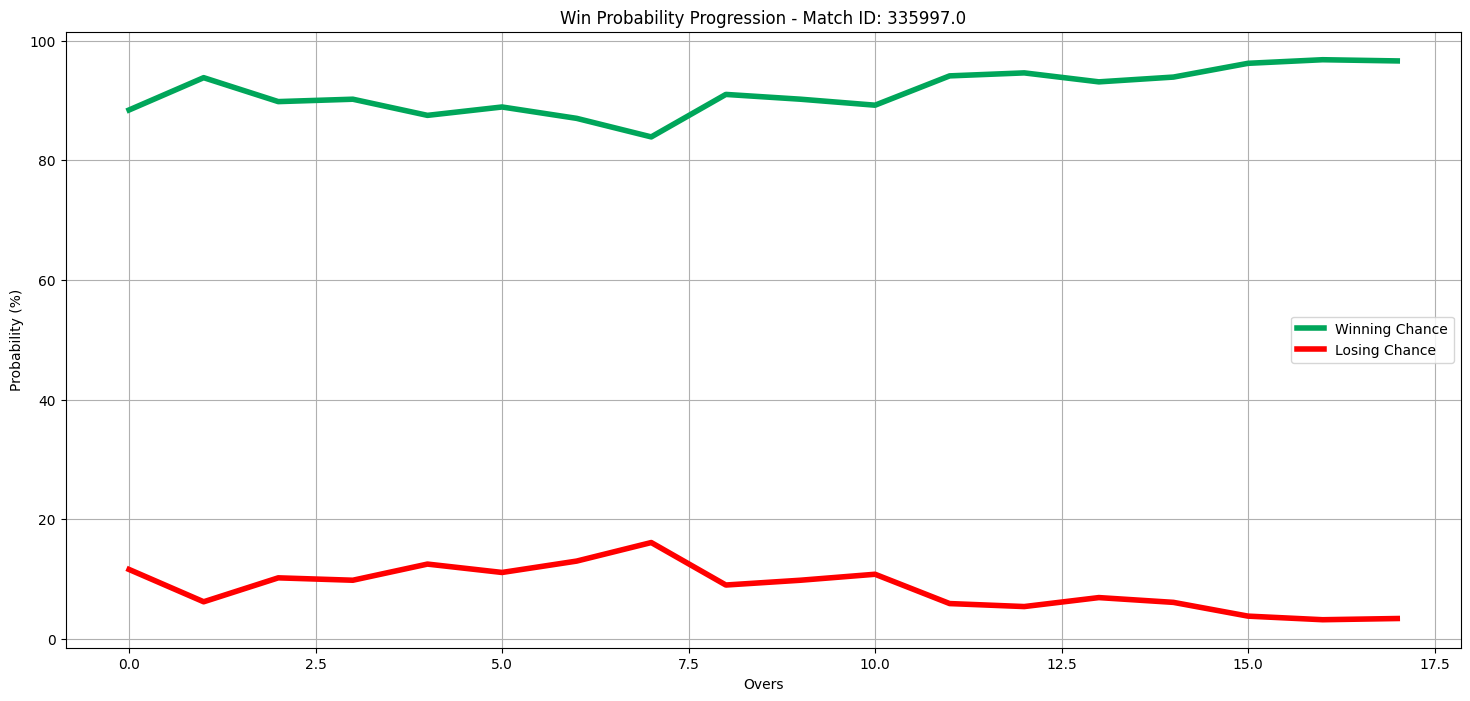

In [323]:
import matplotlib.pyplot as plt

# 1. Get the data for a specific match
match_id = delivery_df['match_id'].unique()[15]
temp_df = match_progression(delivery_df, match_id, pipe)

# 2. Plotting
plt.figure(figsize=(18, 8))
plt.plot(temp_df['over'], temp_df['win'], color='#00a65a', linewidth=4, label='Winning Chance')
plt.plot(temp_df['over'], temp_df['lose'], color='red', linewidth=4, label='Losing Chance')

# 3. Aesthetics
plt.title('Win Probability Progression - Match ID: ' + str(match_id))
plt.xlabel('Overs')
plt.ylabel('Probability (%)')
plt.legend()
plt.grid(True)
plt.show()

In [326]:
# This prints 10 Match IDs that are currently in your clean data
print(delivery_df['match_id'].unique()[:10])

[335982. 335983. 335984. 335985. 335986. 335987. 335988. 335989. 335990.
 335991.]


In [332]:
# Replace with one of the IDs you just printed
fresh_match_id=335990.0

# Run the progression
result_df = match_progression(delivery_df, fresh_match_id, pipe)
result_df

,over,runs_left,balls_left,wickets,win,lose
2010,0.0,209,114.0,10,15.8,84.2
2016,1.0,200,108.0,10,17.8,82.2
2022,2.0,195,102.0,9,14.3,85.7
2028,3.0,183,96.0,9,18.4,81.6
2035,4.0,157,90.0,9,46.6,53.4
2041,5.0,141,84.0,9,60.7,39.3
2047,6.0,132,78.0,9,61.7,38.3
2053,7.0,116,72.0,9,74.2,25.8
2059,8.0,104,66.0,9,79.2,20.8
2065,9.0,100,60.0,8,72.6,27.4


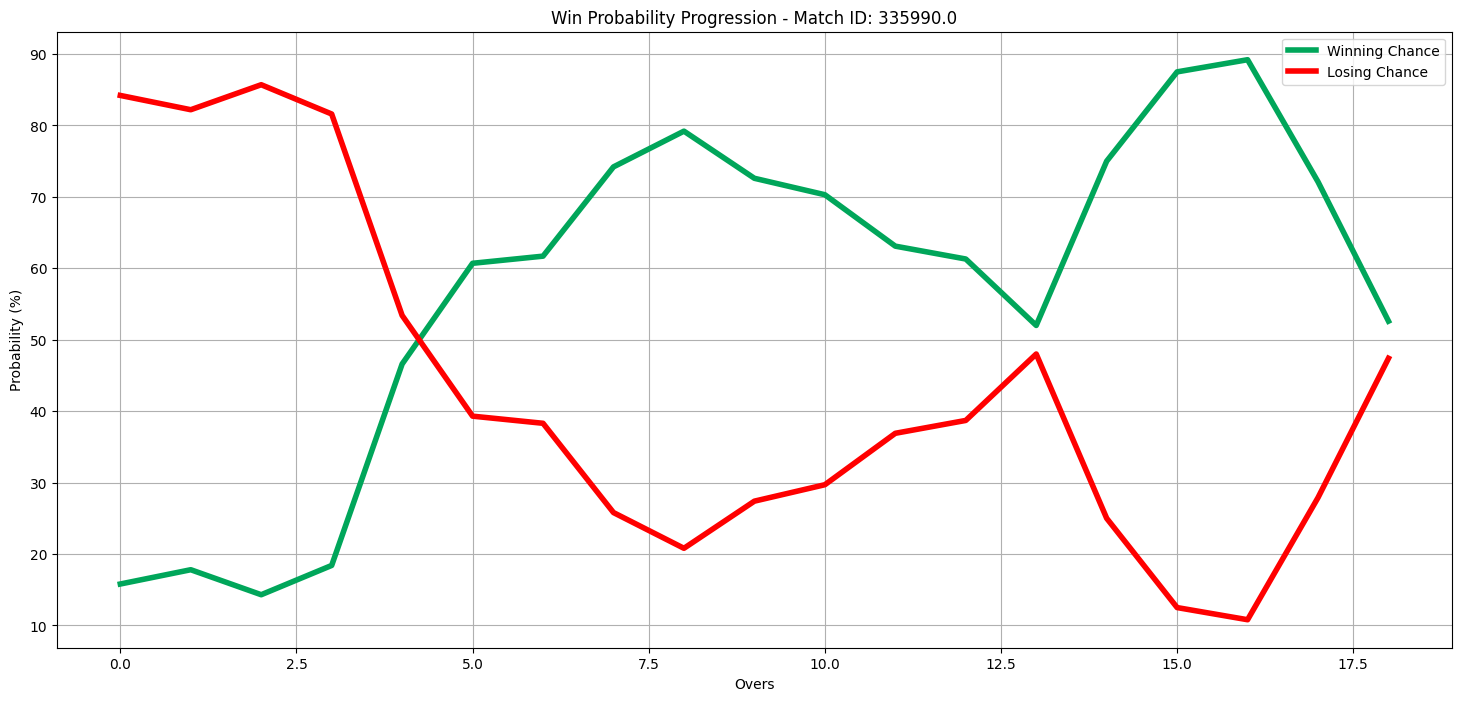

In [338]:
import matplotlib.pyplot as plt
# 1. Get the data for the specified match
temp_df = match_progression(delivery_df, fresh_match_id, pipe)
# 2. Plotting
plt.figure(figsize=(18, 8))
plt.plot(temp_df['over'], temp_df['win'], color='#00a65a', linewidth=4, label='Winning Chance')
plt.plot(temp_df['over'], temp_df['lose'], color='red', linewidth=4, label='Losing Chance')
# 3. Aesthetics
plt.title('Win Probability Progression - Match ID: ' + str(fresh_match_id))
plt.xlabel('Overs')
plt.ylabel('Probability (%)')
plt.legend()
plt.grid(True)
plt.show()


In [339]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Royal Challengers Bengaluru',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Gujarat Titans',
 'Lucknow Super Giants']

In [341]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Unknown', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [343]:
import pickle

# 1. Save the Model Pipeline
pickle.dump(pipe, open('pipe.pkl', 'wb'))

# 2. Save the Team List (Sorted for better UI)
teams_list = [
    'Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
    'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
    'Kings XI Punjab', 'Rajasthan Royals', 'Royal Challengers Bengaluru',
    'Sunrisers Hyderabad'
]
pickle.dump(teams_list, open('teams.pkl', 'wb'))

# 3. Save the City List (Removing any potential NaNs)
cities_list = sorted(delivery_df['city'].dropna().unique().tolist())
pickle.dump(cities_list, open('cities.pkl', 'wb'))